In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Bound States For Finite Potential Well


The finite potential Well problem, when applied the boundary conditions at x=a and x=-a, gives us two equations for bound state ($E \le V0$). These are *even* and *odd* states given by:

* Even States: $$ \alpha tan(\alpha a) = \beta $$
* Odd States: $$ \alpha cot(\alpha a) = -\beta $$

Where $$\alpha = \sqrt{\frac{2mE}{\bar{h}^2}}$$ & $$\beta = \sqrt{\frac{2m(E-V_0)}{\bar{h}^2}}$$


We can write these equations on terms of f(E)=0 and find the roots:

$$ F_{even}(E) = \beta cos(\alpha a) - \alpha sin(\alpha a) = 0$$

&

$$ F_{odd}(E) = \beta sin(\alpha a) + \alpha cos(\alpha a) = 0$$


We'll fix the scale first and write $\bar{h}^2$ in terms of $ev m_e \AA^2$

In [6]:
(9.109e-31 * 1.602e-19*1e-20)/(1.054572e-34)**2

0.13121417116179426

In [7]:
1/0.1312

7.621951219512194

In [8]:
def feven(E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5 #Angstrom
    
    hsq = 7.62195 #me ev Angstrom^2
    
    alpha = np.sqrt((2*m*E)/hsq)
    beta = np.sqrt((2*m*(V0-E))/hsq)
    return -alpha*np.sin(alpha*a)+beta*np.cos(alpha*a)

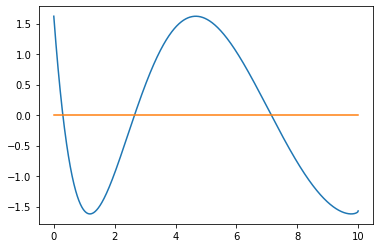

In [9]:
energy = np.linspace(0,10,1000)
plt.plot(energy,feven(energy))
plt.plot(energy,energy*0)

In [11]:
def fodd(E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5 #Angstrom
    
    hsq = 7.62195 #me ev Angstrom^2
    
    alpha = np.sqrt((2*m*E)/hsq)
    beta = np.sqrt((2*m*(V0-E))/hsq)
    return alpha*np.cos(alpha*a)+beta*np.sin(alpha*a)

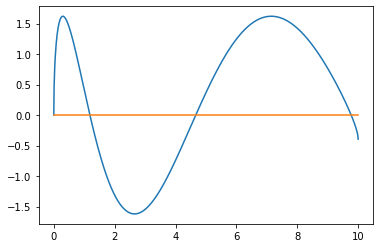

In [12]:
energy = np.linspace(0,10,1000)
plt.plot(energy,fodd(energy))
plt.plot(energy,energy*0)

We see that both the even and odd states have multile roots. We'll try our brute force algorithm developed last time. Check the notebook on "Root Finding" for more info about this method. There are no singularities so we are good to use this method.

In [13]:
def bruteforce(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    roots = []
    
    for i in range(n-1):
        if y[i]*y[i+1] < 0:
            root = x[i] - (x[i+1] - x[i])/(y[i+1] - y[i])*y[i]
            roots.append(root)
            
    return roots

In [14]:
bruteforce(feven,0,10,1000)

[0.29768679502381806, 2.6524712705038933, 7.146078109663371]

In [15]:
bruteforce(fodd,0,10,1000)

[1.1865437671206058, 4.664088814090264, 9.770706123634508]

Let's try a more basic method of bisection and understand what happens if we use it.

In [16]:
def bisection(f,a,b,N):

    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    a_n = a
    b_n = b
    
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
            
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
            
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
    
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2


In [17]:
bisection(feven,0,1,1000)

Found exact solution.


0.2976705927889255

Bisection works but you need to isolate the root intervals and work on each seperately.

In [20]:
solseven = bruteforce(feven,0,10,1000)

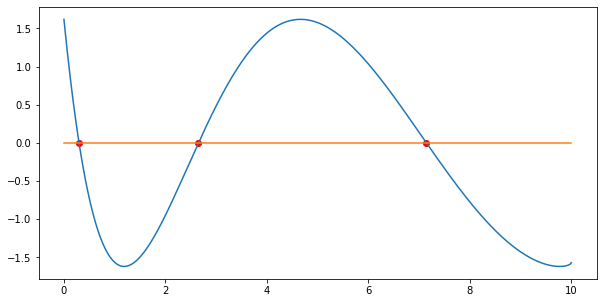

In [21]:
plt.figure(figsize=[10,5])
energy = np.linspace(0,10,1000)
plt.plot(energy,feven(energy))
plt.plot(energy,energy*0)
plt.scatter(solseven,np.zeros(np.size(solseven)),facecolor='red')

In [22]:
solsodd = bruteforce(fodd,0,10,1000)

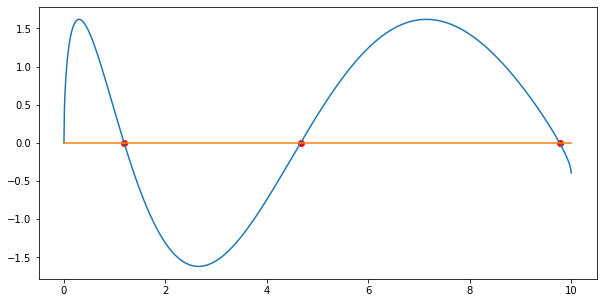

In [23]:
plt.figure(figsize=[10,5])
energy = np.linspace(0,10,1000)
plt.plot(energy,fodd(energy))
plt.plot(energy,energy*0)
plt.scatter(solsodd,np.zeros(np.size(solsodd)),facecolor='red')

#### Now that we have got over Energy Eigenvalues, let's plot the wavefunctions for the odd and even state and see what we get

In [24]:
def region1(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    
    B = np.sqrt(beta/(1+beta*a))*np.cos(alpha*a)*np.exp(beta*a)
    
    
    return B*np.exp(beta*x)

def region2(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    D = np.sqrt(beta/(1+beta*a))
    
    return D*np.cos(alpha*x)


def region3(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    B = np.sqrt(beta/(1+beta*a))*np.cos(alpha*a)*np.exp(beta*a)
    
    return B*np.exp(-beta*x)


In [25]:
def plot_wavefunction(En,color):
    x = np.linspace(-7,-5,1000)
    plt.plot(x,solseven[En]+region1(x,solseven[En]),color,label="$E_n$ = "+"{:3.2f}".format(solseven[En])+"ev")
    x = np.linspace(-5,5,1000)
    plt.plot(x,solseven[En]+region2(x,solseven[En]),color)
    x = np.linspace(5,7,1000)
    plt.plot(x,solseven[En]+region3(x,solseven[En]),color)
    
    return None

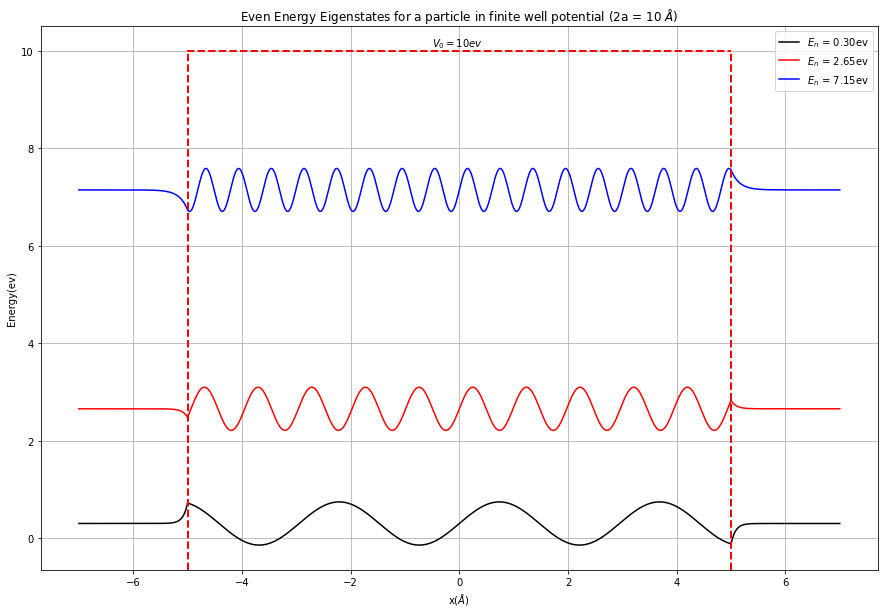

In [37]:
plt.rc('font', size=10)          

plt.figure(figsize=[15,10])
plot_wavefunction(0,"k-")
plot_wavefunction(1,"r")
plot_wavefunction(2,"b-")

plt.grid()
plt.axvline(x=5, linewidth=2, ymax=0.95,color='r',linestyle="--")
plt.axvline(x=-5, linewidth=2, ymax=0.95,color='r',linestyle="--")
plt.axhline(y=10,linewidth=2,xmin=0.175,xmax=1-0.175,color='r',linestyle="--")
plt.xlabel("x($\AA$)")
plt.ylabel("Energy(ev)")
plt.title("Even Energy Eigenstates for a particle in finite well potential (2a = 10 $\AA$)")
plt.text(-0.5,10.1, r'$V_0 = 10 ev$', {'color': 'k', 'fontsize': 10})
plt.legend(prop={"size":10},loc=1)
plt.savefig("Evenenergystates.pdf")

In [29]:
def region1(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    
    B = -np.sqrt(beta/(1+beta*a))*np.sin(alpha*a)*np.exp(beta*a)
    
    
    return B*np.exp(beta*x)

def region2(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    C = np.sqrt(beta/(1+beta*a))
    
    return C*np.sin(alpha*x)


def region3(x,E):
    m = 1.0 #me;
    V0 = 10.0 #ev
    a = 5.0 #Angstrom
    hsq = 0.131 #me ev Angstrom^2
    
    beta = np.sqrt((2*m*(V0-E))/hsq)
    alpha = np.sqrt((2*m*E)/hsq)
    
    B = -np.sqrt(beta/(1+beta*a))*np.sin(alpha*a)*np.exp(beta*a)
    
    return -B*np.exp(-beta*x)

In [30]:
def plot_wavefunction_odd(En,color):
    x = np.linspace(-7,-5,1000)
    plt.plot(x,solsodd[En]+region1(x,solsodd[En]),color,label="$E_n$ = "+"{:3.2f}".format(solsodd[En])+"ev")
    x = np.linspace(-5,5,1000)
    plt.plot(x,solsodd[En]+region2(x,solsodd[En]),color)
    x = np.linspace(5,7,1000)
    plt.plot(x,solsodd[En]+region3(x,solsodd[En]),color)
    
    return None

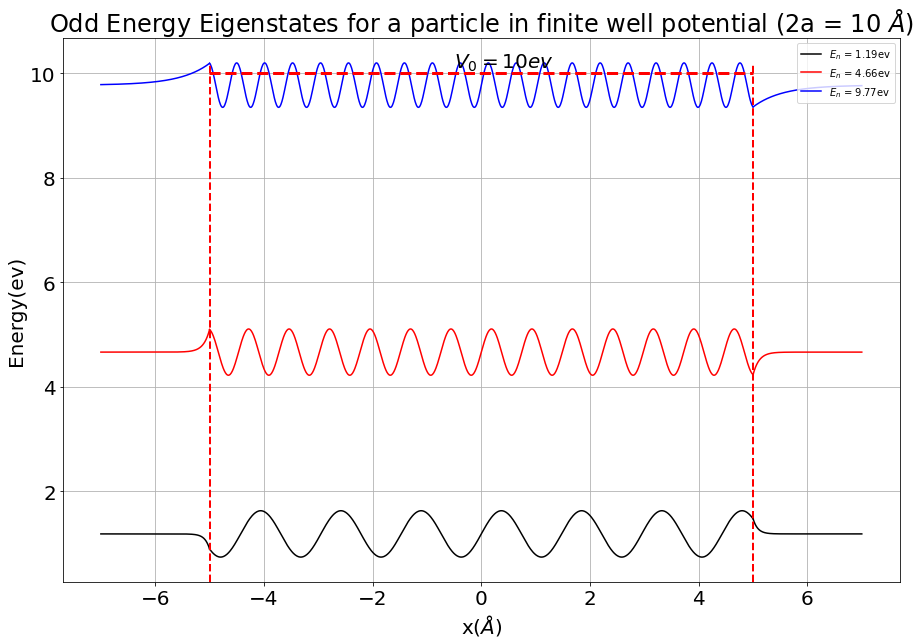

In [38]:
plt.rc('font', size=20)          

plt.figure(figsize=[15,10])
plot_wavefunction_odd(0,"k-")
plot_wavefunction_odd(1,"r")
plot_wavefunction_odd(2,"b-")
plt.grid()
plt.axvline(x=5, linewidth=2, ymax=0.95,color='r',linestyle="--")
plt.axvline(x=-5, linewidth=2, ymax=0.95,color='r',linestyle="--")
plt.axhline(y=10,linewidth=3,xmin=0.175,xmax=1-0.175,color='r',linestyle="--")
plt.xlabel("x($\AA$)")
plt.ylabel("Energy(ev)")
plt.title("Odd Energy Eigenstates for a particle in finite well potential (2a = 10 $\AA$)")
plt.text(-0.5,10.1, r'$V_0 = 10 ev$', {'color': 'k', 'fontsize': 20})
plt.legend(prop={"size":10},loc=1)
plt.savefig("Oddenergystates.pdf")